# OSMnx Library Introduction

---

## Import the library and make a first example

In the next code space I just import the OSMnx library and in the next code space you can find the first example on how to use OSMnx.

In [43]:
# Importing the useful libraries

import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps as cmaps

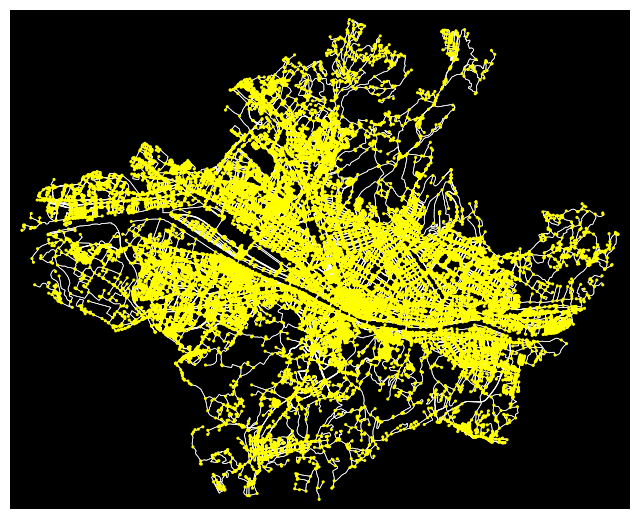

In [2]:
# Searches on OpenStreetMap the place it indicates (in this case "Florence, Italy"),
# downloads the road network of that area,
# builds a graph where:
# - the nodes are intersections, points of interest, etc.
# - the edges are the road segments that connect the nodes.
# - walk = walkable streets

graph = ox.graph_from_place("Florence, Italy", network_type="walk")

fig, ax = ox.plot_graph(
    graph,
    node_color='yellow',
    node_size=5,
    edge_color='white',
    edge_linewidth=0.5,
    bgcolor='black'
)

---

## Another example, let's try to get some K-th Shortest Path

In the next code lines we can figure out how to calculate the k-th shortest path between two places in a specific city.

In [52]:
# Generate MultiIndex (u, v, key) for edges in a path
def generate_multiindex(route_nodes):
    return [(u, v, 0) for u, v in zip(route_nodes[:-1], route_nodes[1:])]

# Load the map data
place = "Piedmont, California, USA"
G = ox.graph_from_place(place, network_type="drive")
G = ox.project_graph(G)

# Define origin and destination nodes
orig = list(G)[0]
dest = list(G)[140]

# Number of shortest paths
k = 10
routes_nodes = list(ox.routing.k_shortest_paths(G, orig, dest, k=k, weight="length"))

# Convert graph to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Get a rainbow colormap and extract k colors
cmap = cmaps["rainbow"]
colors_list = [mcolors.rgb2hex(cmap(i / k)) for i in range(k)]  # Scale i/k to get k distinct colors

# Extract and color edges for each route
colored_routes = []
for i, route in enumerate(routes_nodes):
    idx = generate_multiindex(route)
    edges = gdf_edges[gdf_edges.index.isin(idx)].copy()
    edges["color"] = colors_list[i]
    colored_routes.append(edges)

# Combine all colored route edges
all_routes = pd.concat(colored_routes)
all_routes_gdf = gpd.GeoDataFrame(all_routes)

# Plot using assigned colors
all_routes_gdf.explore(color=all_routes_gdf["color"])